In [35]:
from sklearn import datasets
data = datasets.load_breast_cancer()

In [36]:
data.data.shape

(569, 30)

In [37]:
data_pre = data.data
target = data.target

In [38]:
len(data.feature_names)

30

In [39]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [40]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(data_pre, target, test_size=0.2, random_state=42)

In [41]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [56]:
X_train[0]

array([9.029e+00, 1.733e+01, 5.879e+01, 2.505e+02, 1.066e-01, 1.413e-01,
       3.130e-01, 4.375e-02, 2.111e-01, 8.046e-02, 3.274e-01, 1.194e+00,
       1.885e+00, 1.767e+01, 9.549e-03, 8.606e-02, 3.038e-01, 3.322e-02,
       4.197e-02, 9.559e-03, 1.031e+01, 2.265e+01, 6.550e+01, 3.247e+02,
       1.482e-01, 4.365e-01, 1.252e+00, 1.750e-01, 4.228e-01, 1.175e-01])

In [42]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()

In [43]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
dtc.score(X_train, y_train)

1.0

In [45]:
dtc.score(X_test, y_test)

0.9385964912280702

In [46]:
with open('tree.dot', 'w') as f:
    f = tree.export_graphviz(dtc, out_file=f, feature_names=data.feature_names, class_names=data.target_names)

In [47]:
import numpy as np
max_depths = np.array([1, 2, 3, 5, 7, 9, 11])

In [48]:
max_depths

array([ 1,  2,  3,  5,  7,  9, 11])

In [49]:
train_score = []
test_score = []
for d in max_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=d)
    dtc.fit(X_train, y_train)
    train_score.append(dtc.score(X_train, y_train))
    test_score.append(dtc.score(X_test, y_test))

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

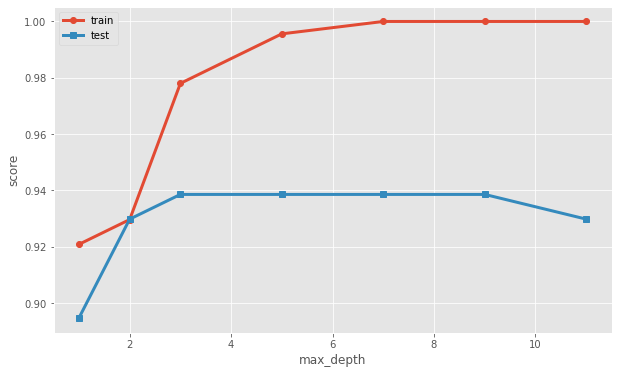

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()

In [52]:
train_score = []
test_score = []
min_samples = np.array([2, 4, 8, 16, 32])
for s in min_samples:
    dtc = tree.DecisionTreeClassifier(min_samples_leaf=s)
    dtc.fit(X_train, y_train)
    train_score.append(dtc.score(X_train, y_train))
    test_score.append(dtc.score(X_test, y_test))

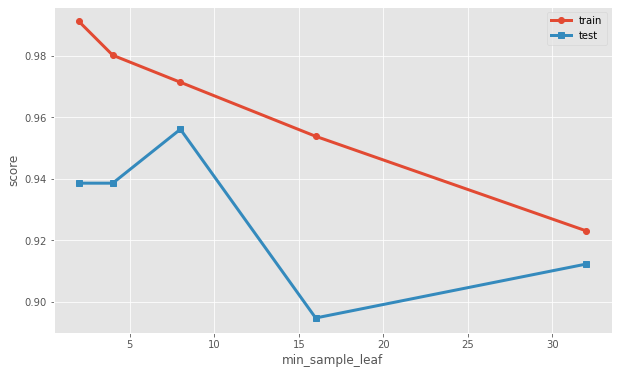

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(min_samples, train_score, 'o-', linewidth=3, label='train')
plt.plot(min_samples, test_score, 's-', linewidth=3, label='test')
plt.xlabel('min_sample_leaf')
plt.ylabel('score')
plt.legend()